# Analyze Customer Churn Of A Telecom Company

# Importing Data

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df_TGraphics= pd.read_csv('/content/drive/My Drive/FatimaQurban_ML&DL_BytewiseFellowship2024/FatimaQurban_ML&DL_BWF_AnalyzeCustomerChurn/telecom_demographics.csv')
df_TUsage=pd.read_csv('/content/drive/My Drive/FatimaQurban_ML&DL_BytewiseFellowship2024/FatimaQurban_ML&DL_BWF_AnalyzeCustomerChurn/telecom_usage.csv')


In [69]:
df_TGraphics.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157


In [70]:
df_TUsage.head()

,customer_id,calls_made,sms_sent,data_used,churn
0,15169,75,21,4532,1
1,149207,35,38,723,1
2,148119,70,47,4688,1
3,187288,95,32,10241,1
4,14016,66,23,5246,1


# Data Preprocessing or Feature Engineering

## 1. Concatenating DataFrames

In [71]:
#we did axis=1 because column wise concat pandas stacks the DataFrames side by side. It matches rows based on the indices of the DataFrames.
concat_churn = pd.concat([df_TGraphics , df_TUsage] , axis=1)
churn_df = pd.DataFrame(concat_churn)

In [72]:
churn_df.sample(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,customer_id,calls_made,sms_sent,data_used,churn
6378,160225,Reliance Jio,M,62,Telangana,Kolkata,241348,2022-03-12,0,132329,160225,86,34,403,0
5161,19291,Reliance Jio,M,70,Tamil Nadu,Chennai,267810,2020-04-06,4,145185,19291,70,12,8972,0
4668,5426,Reliance Jio,M,31,Haryana,Delhi,617846,2020-01-28,1,68697,5426,12,20,3829,0
4461,161008,Airtel,F,54,Odisha,Chennai,777218,2022-03-16,4,100915,161008,51,15,5452,0
2557,13363,BSNL,M,25,Punjab,Delhi,823356,2020-03-07,2,24527,13363,16,50,3100,0


## 2. Finding Nulls for Imputations or Drop

In [73]:
churn_df.isnull().sum() # No imputation required

customer_id           0
telecom_partner       0
gender                0
age                   0
state                 0
city                  0
pincode               0
registration_event    0
num_dependents        0
estimated_salary      0
customer_id           0
calls_made            0
sms_sent              0
data_used             0
churn                 0
dtype: int64

## 3. Feature Extraction

Although i did write the code for removing duplicate columns but Customer_id column is not really necessary in data preprocessing hence i dropped it entirely


In [74]:
#enumerate returns the column index and its names
#churn_df.columns= ['customer_id_1' if col == "customer_id" and i== 10 else col for i, col in enumerate(churn_df.columns) ]

# # Convert registration_event to datetime
churn_df['registration_event'] = pd.to_datetime(churn_df['registration_event'])

# # Extract Date feature
churn_df['reg_year'] = churn_df['registration_event'].dt.year

#changing the position of the column for easier x and y split
churn_df.insert(3, 'city', churn_df.pop('city'))
churn_df.insert(4, 'reg_year', churn_df.pop('reg_year'))
churn_df.insert(5, 'age', churn_df.pop('age'))

# Drop the original registration_event column if it's no longer needed
churn_df=churn_df.drop(columns=["customer_id"])
churn_df=churn_df.drop(columns=["registration_event"]) #we didnt want to deal with date in the problem
churn_df=churn_df.drop(columns=["state"]) # we did this because the datatype was becming an sparse array



In [75]:
churn_df.head()

,telecom_partner,gender,city,reg_year,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Airtel,F,Delhi,2020,26,667173,4,85979,75,21,4532,1
1,Airtel,F,Hyderabad,2022,74,313997,0,69445,35,38,723,1
2,Airtel,F,Chennai,2022,54,549925,2,75949,70,47,4688,1
3,Reliance Jio,M,Hyderabad,2022,29,230636,3,34272,95,32,10241,1
4,Vodafone,M,Bangalore,2020,45,188036,4,34157,66,23,5246,1


## Finding unique label in the column

In [76]:


unique_telecom_partner = churn_df['telecom_partner'].unique()
unique_gender = churn_df['gender'].unique()
unique_city = churn_df['city'].unique()

print("Unique values in 'telecom_partner':", unique_telecom_partner, '\n')
print("Unique values in 'gender':", unique_gender, '\n')
print("Unique values in 'city':", unique_city, '\n')

Unique values in 'telecom_partner': ['Airtel' 'Reliance Jio' 'Vodafone' 'BSNL'] 

Unique values in 'gender': ['F' 'M'] 

Unique values in 'city': ['Delhi' 'Hyderabad' 'Chennai' 'Bangalore' 'Kolkata' 'Mumbai'] 



In [77]:
#X and Y are Dataframe now, if we put .values then they become arrays.  we took them as dataframe becasue its needed in column transformer
X=churn_df.iloc[:,:-1]
y=churn_df.iloc[:,-1]

In [78]:
(X)

,telecom_partner,gender,city,reg_year,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used
0,Airtel,F,Delhi,2020,26,667173,4,85979,75,21,4532
1,Airtel,F,Hyderabad,2022,74,313997,0,69445,35,38,723
2,Airtel,F,Chennai,2022,54,549925,2,75949,70,47,4688
3,Reliance Jio,M,Hyderabad,2022,29,230636,3,34272,95,32,10241
4,Vodafone,M,Bangalore,2020,45,188036,4,34157,66,23,5246
...,...,...,...,...,...,...,...,...,...,...,...
6495,Airtel,M,Chennai,2021,54,125785,4,124805,-2,39,5000
6496,BSNL,M,Hyderabad,2022,69,923076,1,65605,20,31,3562
6497,Airtel,M,Hyderabad,2020,19,152201,0,28632,73,14,65
6498,Vodafone,M,Chennai,2020,26,782127,3,119757,52,8,6835


In [79]:
(y)

0       1
1       1
2       1
3       1
4       1
       ..
6495    0
6496    0
6497    0
6498    0
6499    0
Name: churn, Length: 6500, dtype: int64

# Splitting the dataset into Test and Train

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42) # x_train etc are dataframe

In [81]:
churn_df.sample(10)

,telecom_partner,gender,city,reg_year,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
2313,BSNL,M,Bangalore,2020,38,363993,1,115863,64,29,1432,0
3850,BSNL,M,Chennai,2023,56,721101,3,95872,84,27,3174,0
4275,Airtel,F,Hyderabad,2022,51,670253,0,133245,66,25,626,0
1117,Vodafone,M,Hyderabad,2022,29,351258,1,63019,11,8,7779,1
2583,Airtel,M,Kolkata,2021,38,147721,1,23689,19,28,8893,0
5272,BSNL,F,Hyderabad,2020,30,326752,0,53038,62,0,-10,0
6258,BSNL,F,Delhi,2023,36,298596,2,61080,77,49,-170,0
1113,Reliance Jio,F,Chennai,2023,18,781600,4,113875,46,22,5664,1
574,Vodafone,M,Kolkata,2020,44,281654,0,119887,-6,8,6811,1
873,Reliance Jio,M,Mumbai,2022,22,757535,2,61153,47,42,1915,1


# 5. One-Hot Encoding and Feature Scaling
We would use one-hot encoding to convert **categorical data to numerical format **for feeding the data to ML algorithms

Feature scaling is done because if one column has a bigger value like in 'pincode' in our dataset and other column like 'calls_made' has relatively smaller value. So the biger value would have more effect than the smaller value on the model's accuracy. **we use Standard Scaler to balance the effect of the all columns.**

We can use teo techniques for feature scaling:

1.   **Standarization**
2.   **Normalization**




In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_feature = ['telecom_partner','gender', 'city']

# we do onehotencoder to convert categorical data into binary columns [0,1,0]
ct= ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_feature) # Apply OneHotEncoder to the first column to the categorical_feature given above
    ],
    remainder='passthrough' # keep the other column as they are. 2nd opt is 'drop'; whih is to drop all other column
)


# Apply ColumnTransformer to the training set result would br in numpy array
X_train_transformed = np.array(ct.fit_transform(X_train))

# Apply ColumnTransformer to the test set
X_test_transformed = np.array(ct.transform(X_test))


In [83]:
print(type(X_test_transformed))
print(type(X_train_transformed))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [84]:
print(X_test_transformed)

[[0.000e+00 0.000e+00 1.000e+00 ... 9.500e+01 4.000e+00 4.456e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 5.500e+01 5.300e+01 4.509e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 2.100e+01 4.800e+01 7.905e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 4.100e+01 3.300e+01 4.858e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.100e+01 4.800e+01 1.254e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 5.000e+00 4.500e+01 6.509e+03]]


## 4. Feature Scaling
Feature scaling is done because if one column has a bigger value like in 'pincode' in our dataset and other column like 'calls_made' has relatively smaller value. So the biger value would have more effect than the smaller value on the model's accuracy. **we use Standard Scaler to balance the effect of the all columns.**

We can use teo techniques for feature scaling:

1.   **Standarization**
2.   **Normalization**




In [85]:
print(X_train_transformed[:, 5:-1])

[[0.00000e+00 0.00000e+00 1.00000e+00 ... 1.38069e+05 8.40000e+01
  1.60000e+01]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 2.02620e+04 9.80000e+01
  3.40000e+01]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 2.86230e+04 3.70000e+01
  3.60000e+01]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.08529e+05 7.30000e+01
  1.20000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 7.89250e+04 3.80000e+01
  4.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.47430e+05 1.04000e+02
  2.10000e+01]]


In [86]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_transformed[:, 4: ]= ss.fit_transform(X_train_transformed[:, 4:])
X_test_transformed[:, 4:] = ss.transform(X_test_transformed[:, 4: ])

In [87]:
print(type(X_train_transformed))
print(type(X_test_transformed))
print(type(y_train))
print(type(y_test),'\n')


# Convert the transformed data back to DataFrame to check the result
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

print(type(X_train_transformed))
print(type(X_test_transformed))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'> 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [88]:
(X_test_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,1.0,0.0,1.239591,-1.239591,-0.446388,-0.45565,-0.453803,-0.446697,2.286382,-0.443286,0.818894,0.303761,-1.404672,-1.417749,-0.246837,1.506328,-1.383190,-0.193017
1,0.0,0.0,0.0,1.0,1.239591,-1.239591,-0.446388,-0.45565,-0.453803,-0.446697,2.286382,-0.443286,1.833003,1.153247,1.092538,-1.417749,-1.288013,0.167627,1.974087,-0.175002
2,0.0,0.0,0.0,1.0,-0.806718,0.806718,-0.446388,-0.45565,-0.453803,2.238652,-0.437372,-0.443286,1.833003,1.274602,0.762813,-0.703172,0.528725,-0.970268,1.631508,0.979302
3,1.0,0.0,0.0,0.0,-0.806718,0.806718,-0.446388,-0.45565,-0.453803,-0.446697,2.286382,-0.443286,1.833003,-0.788435,-1.373757,-1.417749,0.121954,-0.300918,-1.040611,1.290992
4,0.0,1.0,0.0,0.0,1.239591,-1.239591,-0.446388,-0.45565,2.203601,-0.446697,-0.437372,-0.443286,0.818894,1.638667,1.055392,0.725983,0.300664,0.535770,-1.588738,1.318524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1.0,0.0,0.0,0.0,-0.806718,0.806718,-0.446388,-0.45565,-0.453803,-0.446697,2.286382,-0.443286,1.833003,0.667827,-0.073457,-1.417749,1.673558,0.669640,-0.766548,-0.560110
1296,1.0,0.0,0.0,0.0,-0.806718,0.806718,-0.446388,-0.45565,2.203601,-0.446697,-0.437372,-0.443286,-0.195216,-1.091823,1.098005,-0.703172,-0.904759,-1.338411,-1.314674,0.510579
1297,1.0,0.0,0.0,0.0,-0.806718,0.806718,-0.446388,-0.45565,-0.453803,2.238652,-0.437372,-0.443286,-1.209326,-0.667080,0.941705,0.725983,-1.697793,-0.300918,0.603770,-0.056376
1298,1.0,0.0,0.0,0.0,1.239591,-1.239591,-0.446388,-0.45565,-0.453803,-0.446697,2.286382,-0.443286,-1.209326,-0.788435,0.643578,-1.417749,-1.298613,-0.970268,1.631508,-1.281380


# Ensuring the X and Y train and test are of same datatypes

For simple encoding and standardization technique

In [89]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# # Identify the categorical and numerical features
# categorical_features = ['telecom_partner', 'gender', 'city']
# numerical_features = [	"age",	"pincode",	"num_dependents",	"estimated_salary",	"calls_made",	"sms_sent",	"data_used"]  # replace 'target_column_name' with the actual target column name

# # Define the ColumnTransformer
# ct = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numerical features
#         ('cat', OneHotEncoder(), categorical_features)  # Apply OneHotEncoder to categorical features
#     ]
# )

# # Apply the ColumnTransformer to the training set
# X_train_transformed = ct.fit_transform(X_train)
# X_test_transformed = ct.transform(X_test)

# print(X_train_transformed)
# print(X_test_transformed)


In [90]:
#Convert the transformed data back to DataFrame to check the result
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

print(type(X_train_transformed))
print(type(X_test_transformed))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# Applying Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

lg_classification = LogisticRegression()

#fitting the model
lg_classification.fit(X_train_transformed, y_train)

#predicting the test value
lg_pred = lg_classification.predict(X_test_transformed)


In [92]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test,lg_pred ))
print(classification_report(y_test,lg_pred ))


0.79
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier()

#fitting the model
rf_classification.fit(X_train_transformed, y_train)

#predicting the test value
rf_pred = rf_classification.predict(X_test_transformed)


In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(accuracy_score(y_test,rf_pred ))
print(classification_report(y_test,rf_pred ))


0.7892307692307692
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.39      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300



In [95]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


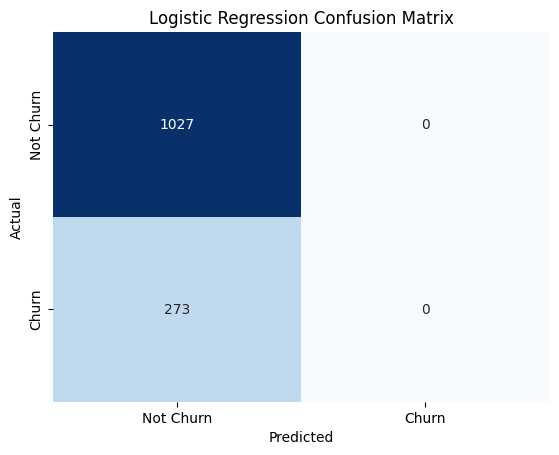

In [96]:
plot_confusion_matrix(y_test, lg_pred, title='Logistic Regression Confusion Matrix')


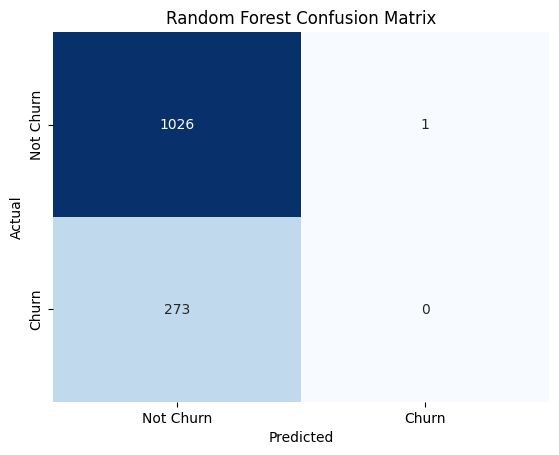

In [97]:
plot_confusion_matrix(y_test, rf_pred, title='Random Forest Confusion Matrix')
